# Principal Component Analysis (PCA)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
pd.Series(y).value_counts()

2    71
1    59
3    48
dtype: int64

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
pca.explained_variance_ratio_.cumsum()
# selecting 2 principal component reach 56.2% variance of the X_train

array([0.36884109, 0.56202504, 0.66955366, 0.74377362, 0.80623266,
       0.85532266, 0.89649554, 0.92145537, 0.94454392, 0.96318516,
       0.98050282, 0.99303067, 1.        ])

In [7]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"confusion matrix:\n {cm}")
print(f"accuracy  : {accuracy:.2f}")

confusion matrix:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
accuracy  : 0.97


## Visualising the Training set and Test set results

In [11]:
from matplotlib.colors import ListedColormap
cp = ListedColormap(["red", "green", "blue"])
(X1, X2) = np.meshgrid(
    np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
    np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01),
)
mesh_pred = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)


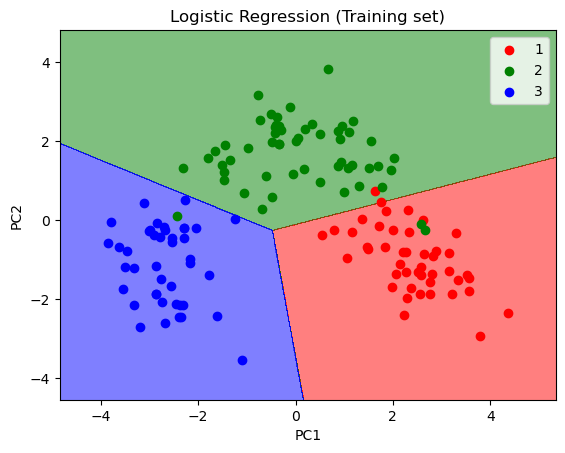

In [12]:
plt.contourf(X1, X2, mesh_pred, alpha=0.5, cmap=cp)
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], color=cp(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

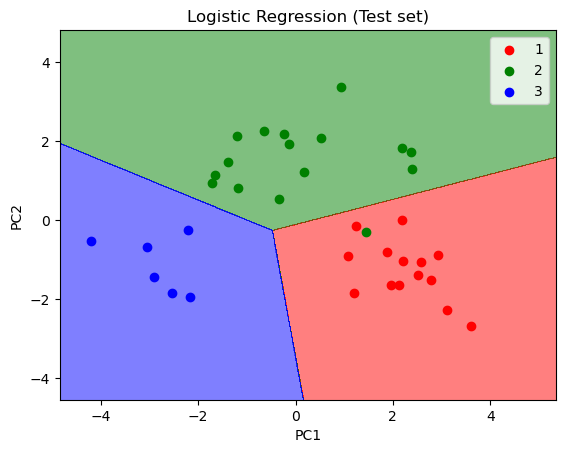

In [13]:
plt.contourf(X1, X2, mesh_pred, alpha=0.5, cmap=cp)

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], color=cp(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()